In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

#### read data

In [2]:
dta = pd.read_csv('R2RQUE1.TXT')
print(dta.shape)

obs = dta[ dta['DATA'] == 'DOE' ]
test = dta[ dta['DATA'] == 'TEST' ]
print(obs.shape, test.shape)

#obs.dtypes
obs.columns

(362, 4)
(6, 4) (356, 4)


Index(['OBSERVATION NUMBER', 'INPUT VAR', 'OUTPUT VAR', 'DATA'], dtype='object')

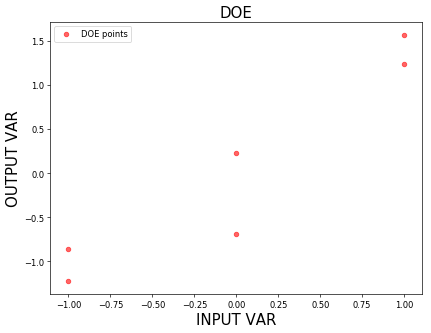

,OBSERVATION NUMBER,INPUT VAR,OUTPUT VAR,DATA
0,-6,-1.0,-1.217490,DOE
1,-5,1.0,1.232123,DOE
2,-4,0.0,0.227152,DOE
3,-3,1.0,1.562098,DOE
4,-2,0.0,-0.690690,DOE
5,-1,-1.0,-0.854506,DOE


In [3]:
plt.figure(figsize=(8, 6), dpi=60)
plt.scatter(obs['INPUT VAR'], obs['OUTPUT VAR'], label='DOE points', s=30, c='red', marker='o', alpha = 0.6)
plt.xlabel('INPUT VAR',size=18)
plt.ylabel('OUTPUT VAR',size=18)
plt.title('DOE', size=18)
plt.legend()
plt.show()
obs

0.3683047732447955
0.3641378590830763
0.4167110850532931


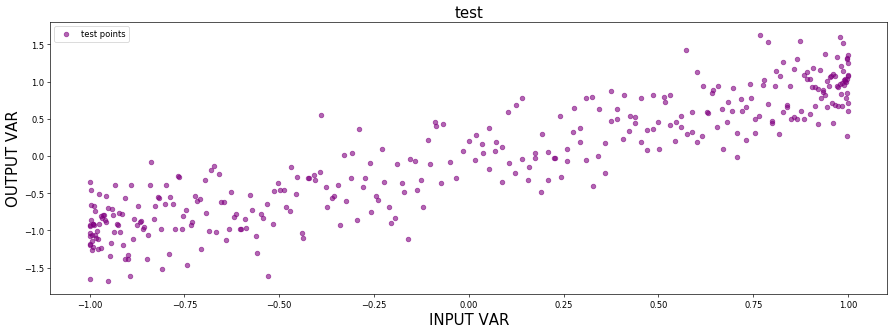

In [4]:
# check test repeat
i=0
while i < test.shape[0]:
    res = sum(test['INPUT VAR'] == test['INPUT VAR'].iloc[i])
    if res > 1 :
        print(i, '>1')
    if res < 1 :
        print(i, '<1')
    i+=1
#
print(np.std(test['OUTPUT VAR'][test['INPUT VAR'] > 0.33].values))
print(np.std(test['OUTPUT VAR'][test['INPUT VAR'] < -0.33].values))
print(np.std(test['OUTPUT VAR'][(test['INPUT VAR'] < 0.33) & (test['INPUT VAR'] > -0.33)].values))

# plot test input
plt.figure(figsize=(18, 6), dpi=60)
plt.scatter(test['INPUT VAR'], test['OUTPUT VAR'], label='test points', s=30, c='purple', marker='o', alpha = 0.6)
plt.xlabel('INPUT VAR',size=18)
plt.ylabel('OUTPUT VAR',size=18)
plt.title('test', size=18)
plt.legend()
plt.show()

> 0.33 :  141 
< -0.33 :  81 
-0.33 < x <0.33 :  58


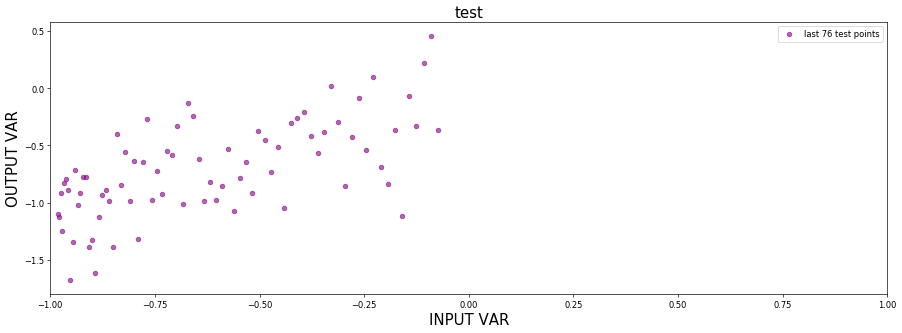

In [5]:
# check test repeat
c1, c0, c_ = 0, 0, 0
i=0
while i < test[0:280].shape[0]:
    res = test['INPUT VAR'][0:280].iloc[i]
    if res > 0.33 :
        c1 += 1
    elif res < -0.33:
        c_ += 1
    else :
        c0 += 1
    i+=1
print('> 0.33 : ', c1, '\n< -0.33 : ', c_, '\n-0.33 < x <0.33 : ', c0)

#
plt.figure(figsize=(18, 6), dpi=60)
plt.scatter(test['INPUT VAR'][280:], test['OUTPUT VAR'][280:], label='last 76 test points',s=30, c='purple', marker='o', alpha = 0.6)
plt.xlim(-1, 1)
plt.xlabel('INPUT VAR',size=18)
plt.ylabel('OUTPUT VAR',size=18)
plt.title('test', size=18)
plt.legend()
plt.show()

#### data processing

In [6]:
xtr = obs['INPUT VAR'].values.reshape((obs.shape[0], 1))
ytr = obs['OUTPUT VAR'].values
xte = test['INPUT VAR'].values.reshape((test.shape[0], 1))
yte = test['OUTPUT VAR'].values

print(xte[0:].min(), xte[0:].max())
print(xtr.shape, xte.shape, ytr.shape, yte.shape)

-0.9999971 0.99999968
(6, 1) (356, 1) (6,) (356,)


In [7]:
# get new doe
m1 = obs[obs['INPUT VAR'] == 1.0]['OUTPUT VAR']
m0 = obs[obs['INPUT VAR'] == 0.0]['OUTPUT VAR']
m_ = obs[obs['INPUT VAR'] == -1.0]['OUTPUT VAR']

ytrm = []
ytrm.append(m1.mean())
ytrm.append(m0.mean())
ytrm.append(m_.mean())
ytrm = np.array(ytrm)

xtrm = np.array([1.0, 0.0, -1.0]).reshape((3, 1))

print(xtrm.shape, ytrm.shape)
#print(xtrm, ytrm, end='\n')

(3, 1) (3,)


#### building model

In [8]:
xt = np.arange(-1.0, 1.1, 0.1)
xt = xt.reshape((xt.shape[0], 1))

reg = LinearRegression()
reg.fit(xtrm, ytrm)
#reg.get_params(deep=True)
print(reg.coef_, reg.intercept_ )

yprm = reg.predict(xtrm)
yp = reg.predict(xt)

#
degree = 2
poly_reg = make_pipeline( PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(xtrm, ytrm)

yprm_p = poly_reg.predict(xtrm)
yp2 = poly_reg.predict(xt)

print(yprm.shape, yprm_p.shape)

[1.21655446] 0.04311451333333342
(3,) (3,)


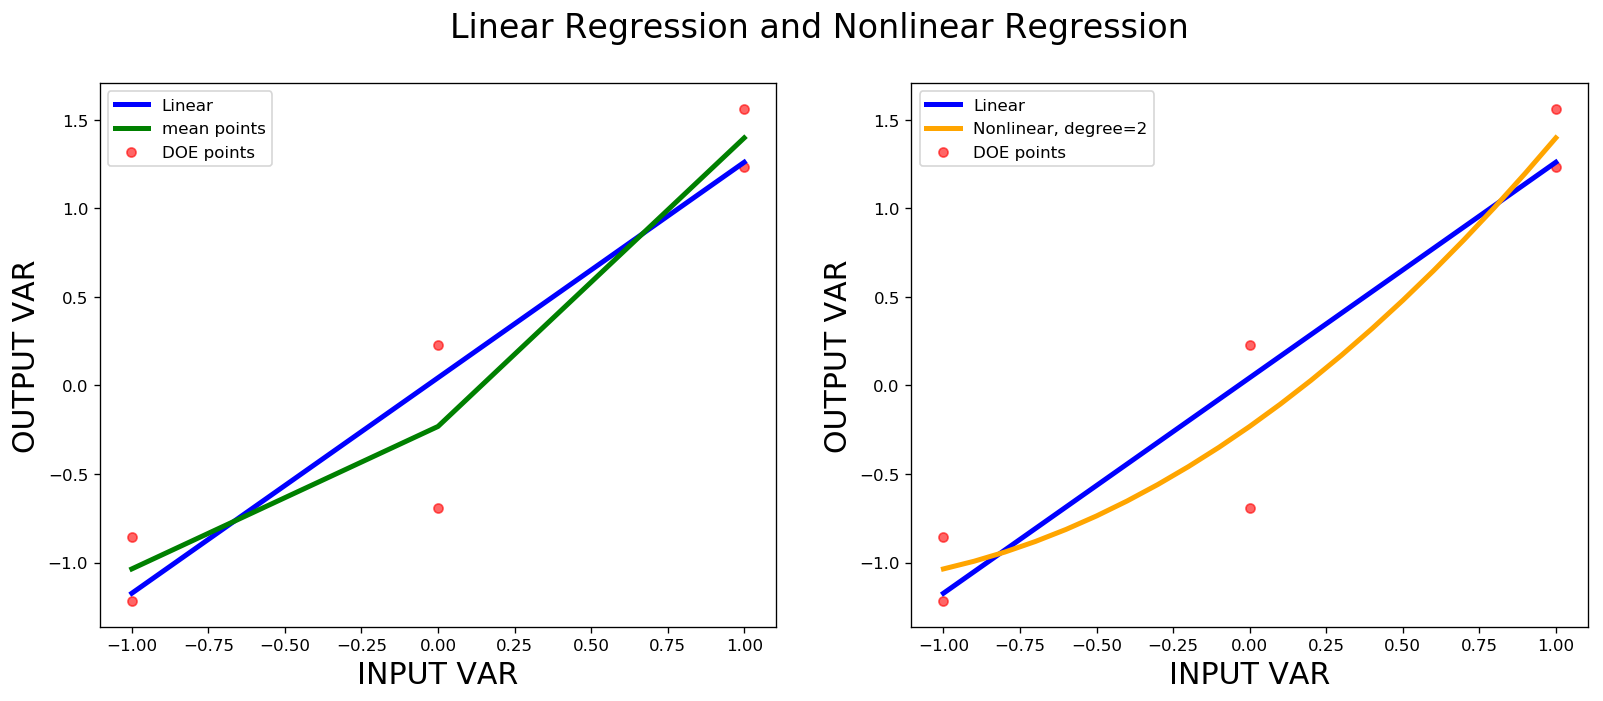

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=120)

ax1.scatter(obs['INPUT VAR'], obs['OUTPUT VAR'], s=30, c='red', marker='o', alpha = 0.6, label='DOE points')
ax1.plot(xtrm, yprm, color='blue', linewidth=3, label = 'Linear')
ax1.plot(xtrm, ytrm, color='green', linewidth=3, label = 'mean points')
ax1.set_xlabel('INPUT VAR',size=18)
ax1.set_ylabel('OUTPUT VAR',size=18)
ax1.legend()

ax2.scatter(obs['INPUT VAR'], obs['OUTPUT VAR'], s=30, c='red', marker='o', alpha = 0.6, label='DOE points')
ax2.plot(xtrm, yprm, color='blue', linewidth=3, label = 'Linear')
ax2.plot(xt, yp2, color='orange', linewidth=3, label = 'Nonlinear, degree=2')
ax2.set_xlabel('INPUT VAR',size=18)
ax2.set_ylabel('OUTPUT VAR',size=18)
ax2.legend()

fig.suptitle('Linear Regression and Nonlinear Regression', size=20)
plt.show()

In [10]:
# def mean method predict
def mean_method(xtrain, meanx, meany):
    ypr = []
    i = 0
    while i < xtrain.shape[0]:
        xt = xtrain[i]
        
        if (-1 <= xt < 0):
            pr = (meany[1] - meany[2]) *(xt+1) +meany[2]
        elif (0 <= xt <= 1):
            pr = (meany[0] - meany[1]) *(xt) +meany[1]
        else:
            print('< -1 or > 1')

        ypr.append(pr)
        i += 1
    ypr = np.array(ypr)
    return ypr

In [11]:
# minus -> control value, target -> 0
def mean_square_error(output_var, output_pre):
    minus = output_pre - output_var
    minus2 = minus**2  # np.power(minus, 2)
    sqare_sum = np.sum(minus2)/output_pre.shape[0]
    return minus, minus2, sqare_sum

0.13670001308452615


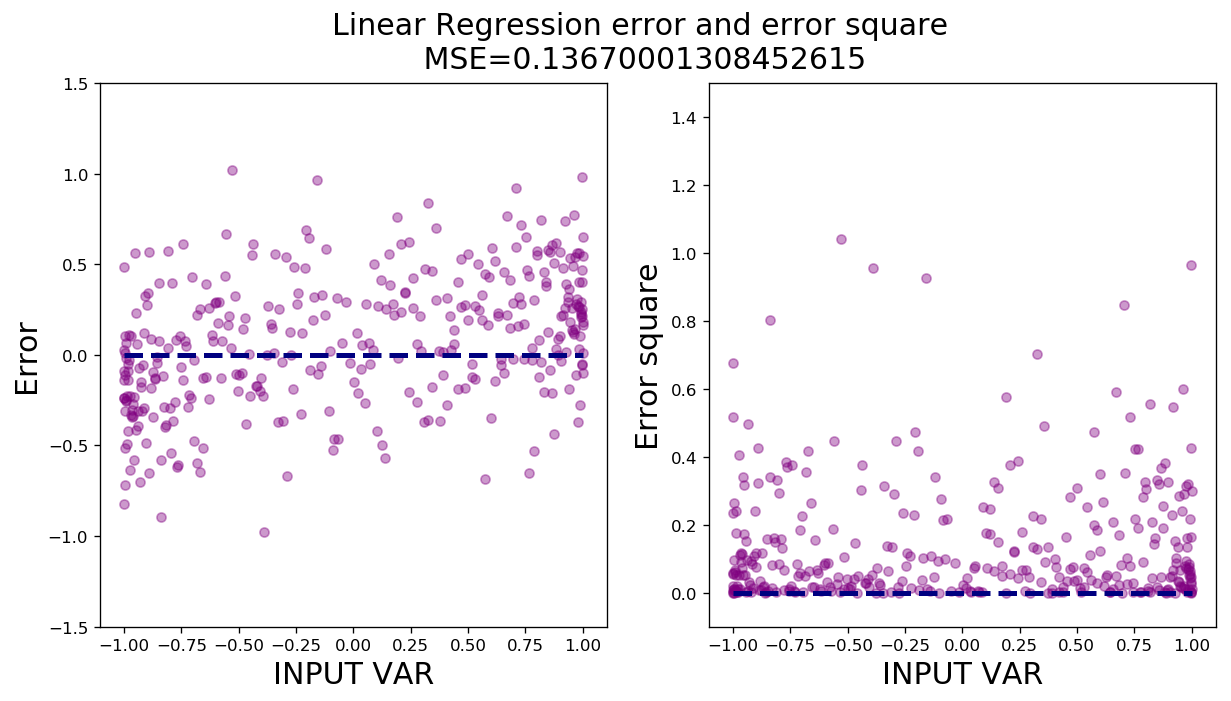

In [12]:
# linear reg
ypre = reg.predict(xte)

linear_m, linear_m2, linear_sq = mean_square_error(yte, ypre)
print(linear_sq)

#plt.figure(figsize=(8, 6), dpi=60)
#fig, (ax1, ax2) = plt.subplots(2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=120)

ax1.scatter(xte, linear_m, s=30, c='purple', marker='o', alpha = 0.4)
ax1.hlines(0, -1, 1, color='navy',linestyles='dashed', linewidth=3)
ax1.set_ylim([-1.5, 1.5])
ax1.set_xlabel('INPUT VAR',size=18)
ax1.set_ylabel('Error',size=18)

ax2.scatter(xte, linear_m2, s=30, c='purple', marker='o', alpha = 0.4)
ax2.hlines(0, -1, 1, color='navy',linestyles='dashed', linewidth=3)
ax2.set_ylim([-0.1, 1.5])
ax2.set_xlabel('INPUT VAR',size=18)
ax2.set_ylabel('Error square',size=18)

fig.suptitle('Linear Regression error and error square' + '\n MSE='+str(linear_sq), size=18)
plt.show()

0.1442992589891024


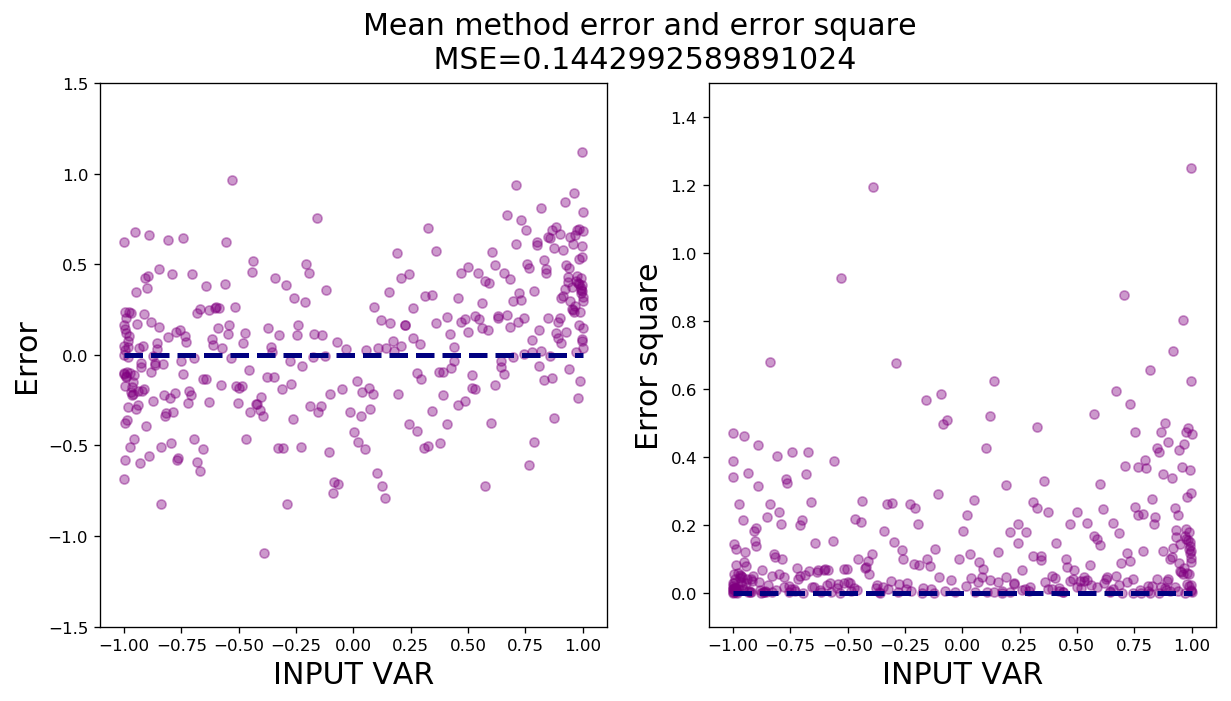

In [13]:
## mean method
yprr = mean_method(xte, xtrm, ytrm)
yprr = yprr.reshape((yprr.shape[0]))

mean_m, mean_m2, mean_sq = mean_square_error(yte, yprr)
print(mean_sq)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=120)

ax1.scatter(xte, mean_m, s=30, c='purple', marker='o', alpha = 0.4)
ax1.hlines(0, -1, 1, color='navy',linestyles='dashed', linewidth=3)
ax1.set_ylim([-1.5, 1.5])
ax1.set_xlabel('INPUT VAR',size=18)
ax1.set_ylabel('Error',size=18)

ax2.scatter(xte, mean_m2, s=30, c='purple', marker='o', alpha = 0.4)
ax2.hlines(0, -1, 1, color='navy',linestyles='dashed', linewidth=3)
ax2.set_ylim([-0.1, 1.5])
ax2.set_xlabel('INPUT VAR',size=18)
ax2.set_ylabel('Error square',size=18)

fig.suptitle('Mean method error and error square' + '\n MSE='+str(mean_sq), size=18)
plt.show()

0.13670001308452615


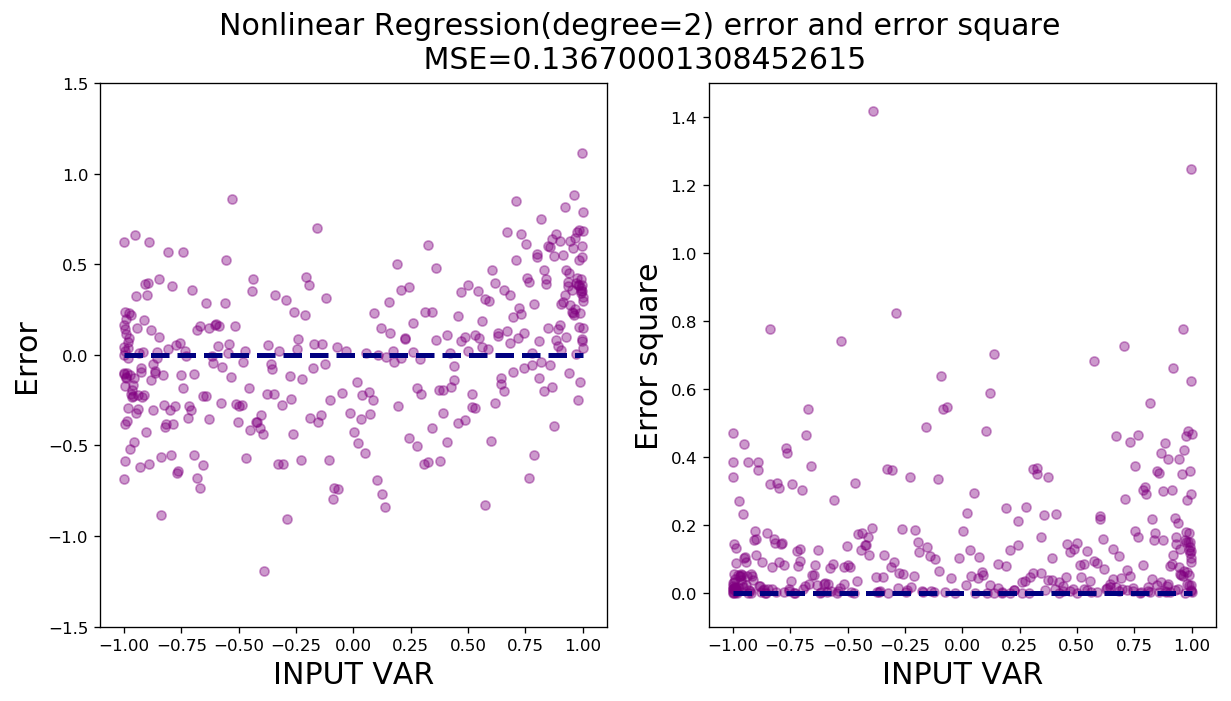

In [14]:
# nonlinear reg
ypre = poly_reg.predict(xte)

non_m, non_m2, non_sq = mean_square_error(yte, ypre)
print(linear_sq)

#plt.figure(figsize=(8, 6), dpi=60)
#fig, (ax1, ax2) = plt.subplots(2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=120)

ax1.scatter(xte, non_m, s=30, c='purple', marker='o', alpha = 0.4)
ax1.hlines(0, -1, 1, color='navy',linestyles='dashed', linewidth=3)
ax1.set_ylim([-1.5, 1.5])
ax1.set_xlabel('INPUT VAR',size=18)
ax1.set_ylabel('Error',size=18)

ax2.scatter(xte, non_m2, s=30, c='purple', marker='o', alpha = 0.4)
ax2.hlines(0, -1, 1, color='navy',linestyles='dashed', linewidth=3)
ax2.set_ylim([-0.1, 1.5])
ax2.set_xlabel('INPUT VAR',size=18)
ax2.set_ylabel('Error square',size=18)

fig.suptitle('Nonlinear Regression(degree=2) error and error square' + '\n MSE='+str(linear_sq), size=18)
plt.show()

#### building relearning model

In [15]:
# new_train
def new_train(xtrain, ytrain, xtest, ytest, N):
    testx = xtest[N:]
    testy = ytest[N:]

    trainx = np.append(xtrain, xtest[0:N], axis=0)
    trainy = np.append(ytrain, ytest[0:N])

#    print(trainx.shape, trainy.shape, testx.shape, testy.shape)
    return trainx, trainy, testx, testy


# def relearn
def relearn(REG, xtrain, ytrain, xtest, ytest, N):
    n_xtr, n_ytr, n_xte, n_yte = new_train(xtrain, ytrain, xtest, ytest, N)

    reg = REG
    reg.fit(n_xtr, n_ytr)
#    print(reg.coef_, reg.intercept_)
    
    if (n_yte.shape[0] > N):
        y_pre = reg.predict(n_xte[0:N])
    else:
        y_pre = reg.predict(n_xte)
    
    return n_xtr, n_ytr, n_xte, n_yte, y_pre

In [16]:
xtr = obs['INPUT VAR'].values.reshape((obs.shape[0], 1))
ytr = obs['OUTPUT VAR'].values
xte = test['INPUT VAR'].values.reshape((test.shape[0], 1))
yte = test['OUTPUT VAR'].values

print(xte[0:].min(), xte[0:].max())
print(xtr.shape, xte.shape, ytr.shape, yte.shape)

# get new doe
m1 = obs[obs['INPUT VAR'] == 1.0]['OUTPUT VAR']
m0 = obs[obs['INPUT VAR'] == 0.0]['OUTPUT VAR']
m_ = obs[obs['INPUT VAR'] == -1.0]['OUTPUT VAR']

ytrm = []
ytrm.append(m1.mean())
ytrm.append(m0.mean())
ytrm.append(m_.mean())
ytrm = np.array(ytrm)

xtrm = np.array([1.0, 0.0, -1.0]).reshape((3, 1))
print(xtrm.shape, ytrm.shape)

-0.9999971 0.99999968
(6, 1) (356, 1) (6,) (356,)
(3, 1) (3,)


In [17]:
reg = LinearRegression()
reg.fit(xtrm, ytrm)
ypre = reg.predict(xte)

linear_m, linear_m2, linear_sq = mean_square_error(yte, ypre)
rm_linear = []
rm_linear.append(linear_m)
rm2_linear = []
rm2_linear.append(linear_m2)
rsq_linear = []
rsq_linear.append(linear_sq)


lim = xte.shape[0]
ln = 30

i = 1
while i*ln < lim:
    xtrm, ytrm, xte, yte, y_pre = relearn(LinearRegression(), xtrm, ytrm, xte, yte, ln)
    if (yte.shape[0] > ln):
        yten = yte[0:ln]
    else:
        yten = yte

    linear_m, linear_m2, linear_sq = mean_square_error(yten, y_pre)
    rm_linear.append(linear_m)
    rm2_linear.append(linear_m2)
    rsq_linear.append(linear_sq)
    
    print('-'*15, 'MSE = ', mean_squared_error(yten, y_pre), '-'*15)
    print('-'*15, str(i), '-'*15)
    i += 1

--------------- MSE =  0.13003977478181206 ---------------
--------------- 1 ---------------
--------------- MSE =  0.0885444294932122 ---------------
--------------- 2 ---------------
--------------- MSE =  0.06519810275130387 ---------------
--------------- 3 ---------------
--------------- MSE =  0.10439635630262953 ---------------
--------------- 4 ---------------
--------------- MSE =  0.10331448268668744 ---------------
--------------- 5 ---------------
--------------- MSE =  0.15042374354714308 ---------------
--------------- 6 ---------------
--------------- MSE =  0.16861366126986038 ---------------
--------------- 7 ---------------
--------------- MSE =  0.13781414067960782 ---------------
--------------- 8 ---------------
--------------- MSE =  0.06766417900222979 ---------------
--------------- 9 ---------------
--------------- MSE =  0.09501066308459143 ---------------
--------------- 10 ---------------
--------------- MSE =  0.12349991766263178 ---------------
-----------

#### polynomial regression


In [18]:
xtr = obs['INPUT VAR'].values.reshape((obs.shape[0], 1))
ytr = obs['OUTPUT VAR'].values
xte = test['INPUT VAR'].values.reshape((test.shape[0], 1))
yte = test['OUTPUT VAR'].values

print(xte[0:].min(), xte[0:].max())
print(xtr.shape, xte.shape, ytr.shape, yte.shape)

# get new doe
m1 = obs[obs['INPUT VAR'] == 1.0]['OUTPUT VAR']
m0 = obs[obs['INPUT VAR'] == 0.0]['OUTPUT VAR']
m_ = obs[obs['INPUT VAR'] == -1.0]['OUTPUT VAR']

ytrm = []
ytrm.append(m1.mean())
ytrm.append(m0.mean())
ytrm.append(m_.mean())
ytrm = np.array(ytrm)

xtrm = np.array([1.0, 0.0, -1.0]).reshape((3, 1))
print(xtrm.shape, ytrm.shape)


-0.9999971 0.99999968
(6, 1) (356, 1) (6,) (356,)
(3, 1) (3,)


In [19]:
degree = 2
poly_reg = make_pipeline( PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(xtrm, ytrm)

linear_m, linear_m2, linear_sq = mean_square_error(yte, ypre)
rm_nonlinear = []
rm_nonlinear.append(linear_m)
rm2_nonlinear = []
rm2_nonlinear.append(linear_m2)
rsq_nonlinear = []
rsq_nonlinear.append(linear_sq)


lim = xte.shape[0]

i = 1
while i*ln < lim:
    xtrm, ytrm, xte, yte, y_pre = relearn(poly_reg, xtrm, ytrm, xte, yte, ln)
    if (yte.shape[0] > ln):
        yten = yte[0:ln]
    else:
        yten = yte

    linear_m, linear_m2, linear_sq = mean_square_error(yten, y_pre)
    rm_nonlinear.append(linear_m)
    rm2_nonlinear.append(linear_m2)
    rsq_nonlinear.append(linear_sq)
    
    print('-'*15, 'MSE = ', mean_squared_error(yten, y_pre), '-'*15)
    print('-'*15, str(i), '-'*15)
    i += 1

--------------- MSE =  0.13787505447390602 ---------------
--------------- 1 ---------------
--------------- MSE =  0.08916189172145732 ---------------
--------------- 2 ---------------
--------------- MSE =  0.06543788704816521 ---------------
--------------- 3 ---------------
--------------- MSE =  0.10409168167370421 ---------------
--------------- 4 ---------------
--------------- MSE =  0.10375815272990895 ---------------
--------------- 5 ---------------
--------------- MSE =  0.14987488235993845 ---------------
--------------- 6 ---------------
--------------- MSE =  0.17264923199180787 ---------------
--------------- 7 ---------------
--------------- MSE =  0.12530180619161918 ---------------
--------------- 8 ---------------
--------------- MSE =  0.07722620160796635 ---------------
--------------- 9 ---------------
--------------- MSE =  0.09373654880389179 ---------------
--------------- 10 ---------------
--------------- MSE =  0.11945925922111192 ---------------
----------

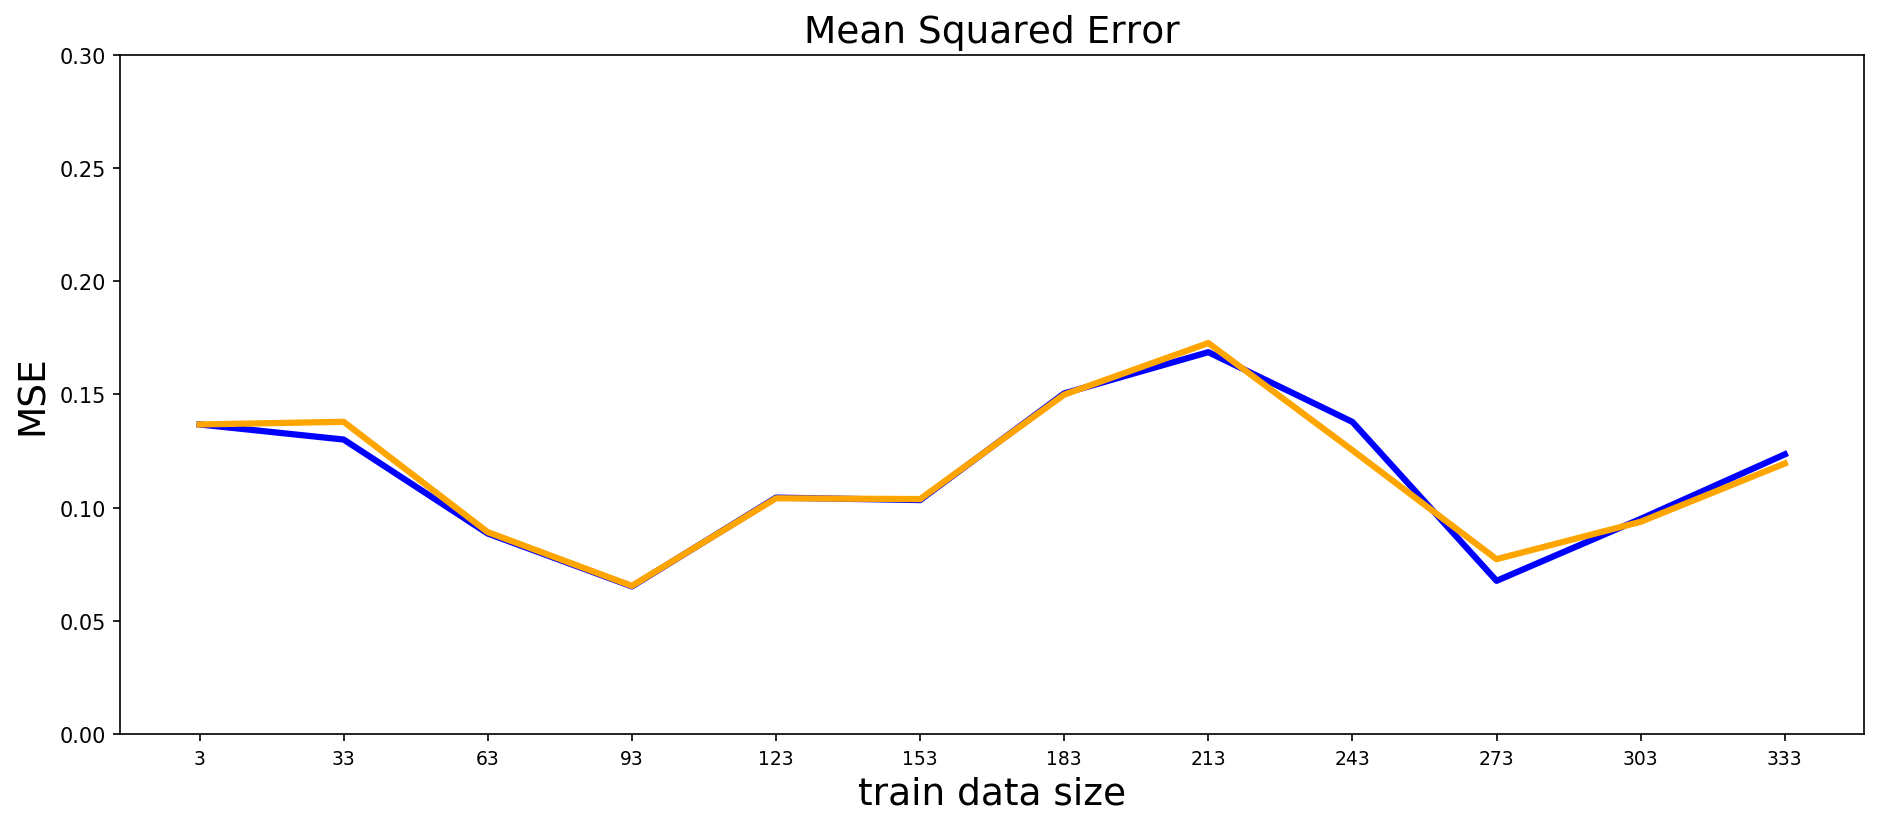

In [20]:
plt.figure(figsize=(15, 6), dpi=150)

xvalue = list(range(3, test.shape[0], ln))

plt.plot(xvalue, rsq_linear, color='blue', linewidth=3)
plt.plot(xvalue, rsq_nonlinear, color='orange', linewidth=3)

plt.ylim(0,0.3)
plt.xticks(xvalue, fontsize=9)

plt.title('Mean Squared Error', size=18)
plt.xlabel('train data size',size=18)
plt.ylabel('MSE',size=18)
#plt.legend()
plt.show()


In [21]:
# def relearn predict all
def relearn(REG, xtrain, ytrain, xtest, ytest, N):
    n_xtr, n_ytr, n_xte, n_yte = new_train(xtrain, ytrain, xtest, ytest, N)

    reg = REG
    reg.fit(n_xtr, n_ytr)
    
#    print(reg.coef_, reg.intercept_)
    y_pre = reg.predict(n_xte)
    
    return n_xtr, n_ytr, n_xte, n_yte, y_pre

In [22]:
xtr = obs['INPUT VAR'].values.reshape((obs.shape[0], 1))
ytr = obs['OUTPUT VAR'].values
xte = test['INPUT VAR'].values.reshape((test.shape[0], 1))
yte = test['OUTPUT VAR'].values

print(xte[0:].min(), xte[0:].max())
print(xtr.shape, xte.shape, ytr.shape, yte.shape)

# get new doe
m1 = obs[obs['INPUT VAR'] == 1.0]['OUTPUT VAR']
m0 = obs[obs['INPUT VAR'] == 0.0]['OUTPUT VAR']
m_ = obs[obs['INPUT VAR'] == -1.0]['OUTPUT VAR']

ytrm = []
ytrm.append(m1.mean())
ytrm.append(m0.mean())
ytrm.append(m_.mean())
ytrm = np.array(ytrm)

xtrm = np.array([1.0, 0.0, -1.0]).reshape((3, 1))
print(xtrm.shape, ytrm.shape)


-0.9999971 0.99999968
(6, 1) (356, 1) (6,) (356,)
(3, 1) (3,)


In [23]:
reg = LinearRegression()
reg.fit(xtrm, ytrm)
ypre = reg.predict(xte)

linear_m, linear_m2, linear_sq = mean_square_error(yte, ypre)
rm_linear = []
rm_linear.append(linear_m)
rm2_linear = []
rm2_linear.append(linear_m2)
rsq_linear = []
rsq_linear.append(linear_sq)


lim = xte.shape[0]
ln = 30

i = 1
while i*ln < lim:
    xtrm, ytrm, xte, yte, y_pre = relearn(LinearRegression(), xtrm, ytrm, xte, yte, ln)
    
    linear_m, linear_m2, linear_sq = mean_square_error(yte, y_pre)
    rm_linear.append(linear_m)
    rm2_linear.append(linear_m2)
    rsq_linear.append(linear_sq)
    
    print('-'*15, 'MSE = ', mean_squared_error(yte, y_pre), '-'*15)
    print('-'*15, str(i), '-'*15)
    i += 1

--------------- MSE =  0.11200718898697769 ---------------
--------------- 1 ---------------
--------------- MSE =  0.10927214538040161 ---------------
--------------- 2 ---------------
--------------- MSE =  0.11216915978722829 ---------------
--------------- 3 ---------------
--------------- MSE =  0.11747918461089166 ---------------
--------------- 4 ---------------
--------------- MSE =  0.12013539138063996 ---------------
--------------- 5 ---------------
--------------- MSE =  0.1220566385162075 ---------------
--------------- 6 ---------------
--------------- MSE =  0.11528917208874774 ---------------
--------------- 7 ---------------
--------------- MSE =  0.10422873761050856 ---------------
--------------- 8 ---------------
--------------- MSE =  0.09467632847393843 ---------------
--------------- 9 ---------------
--------------- MSE =  0.10822721184194904 ---------------
--------------- 10 ---------------
--------------- MSE =  0.12349991766263178 ---------------
-----------

In [24]:
xtr = obs['INPUT VAR'].values.reshape((obs.shape[0], 1))
ytr = obs['OUTPUT VAR'].values
xte = test['INPUT VAR'].values.reshape((test.shape[0], 1))
yte = test['OUTPUT VAR'].values

print(xte[0:].min(), xte[0:].max())
print(xtr.shape, xte.shape, ytr.shape, yte.shape)

# get new doe
m1 = obs[obs['INPUT VAR'] == 1.0]['OUTPUT VAR']
m0 = obs[obs['INPUT VAR'] == 0.0]['OUTPUT VAR']
m_ = obs[obs['INPUT VAR'] == -1.0]['OUTPUT VAR']

ytrm = []
ytrm.append(m1.mean())
ytrm.append(m0.mean())
ytrm.append(m_.mean())
ytrm = np.array(ytrm)

xtrm = np.array([1.0, 0.0, -1.0]).reshape((3, 1))
print(xtrm.shape, ytrm.shape)


-0.9999971 0.99999968
(6, 1) (356, 1) (6,) (356,)
(3, 1) (3,)


In [25]:
degree = 2
poly_reg = make_pipeline( PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(xtrm, ytrm)

linear_m, linear_m2, linear_sq = mean_square_error(yte, ypre)
rm_nonlinear = []
rm_nonlinear.append(linear_m)
rm2_nonlinear = []
rm2_nonlinear.append(linear_m2)
rsq_nonlinear = []
rsq_nonlinear.append(linear_sq)


lim = xte.shape[0]

i = 1
while i*ln < lim:
    xtrm, ytrm, xte, yte, y_pre = relearn(poly_reg, xtrm, ytrm, xte, yte, ln)
    
    linear_m, linear_m2, linear_sq = mean_square_error(yte, y_pre)
    rm_nonlinear.append(linear_m)
    rm2_nonlinear.append(linear_m2)
    rsq_nonlinear.append(linear_sq)
    
    print('-'*15, 'MSE = ', mean_squared_error(yte, y_pre), '-'*15)
    print('-'*15, str(i), '-'*15)
    i += 1

--------------- MSE =  0.11526798900648606 ---------------
--------------- 1 ---------------
--------------- MSE =  0.10776374176033322 ---------------
--------------- 2 ---------------
--------------- MSE =  0.10959288373128487 ---------------
--------------- 3 ---------------
--------------- MSE =  0.1154885183967274 ---------------
--------------- 4 ---------------
--------------- MSE =  0.11722621134169119 ---------------
--------------- 5 ---------------
--------------- MSE =  0.11975523752000422 ---------------
--------------- 6 ---------------
--------------- MSE =  0.11327864536769926 ---------------
--------------- 7 ---------------
--------------- MSE =  0.10024834050676448 ---------------
--------------- 8 ---------------
--------------- MSE =  0.09592548369792413 ---------------
--------------- 9 ---------------
--------------- MSE =  0.10573006783232253 ---------------
--------------- 10 ---------------
--------------- MSE =  0.11945925922111192 ---------------
-----------

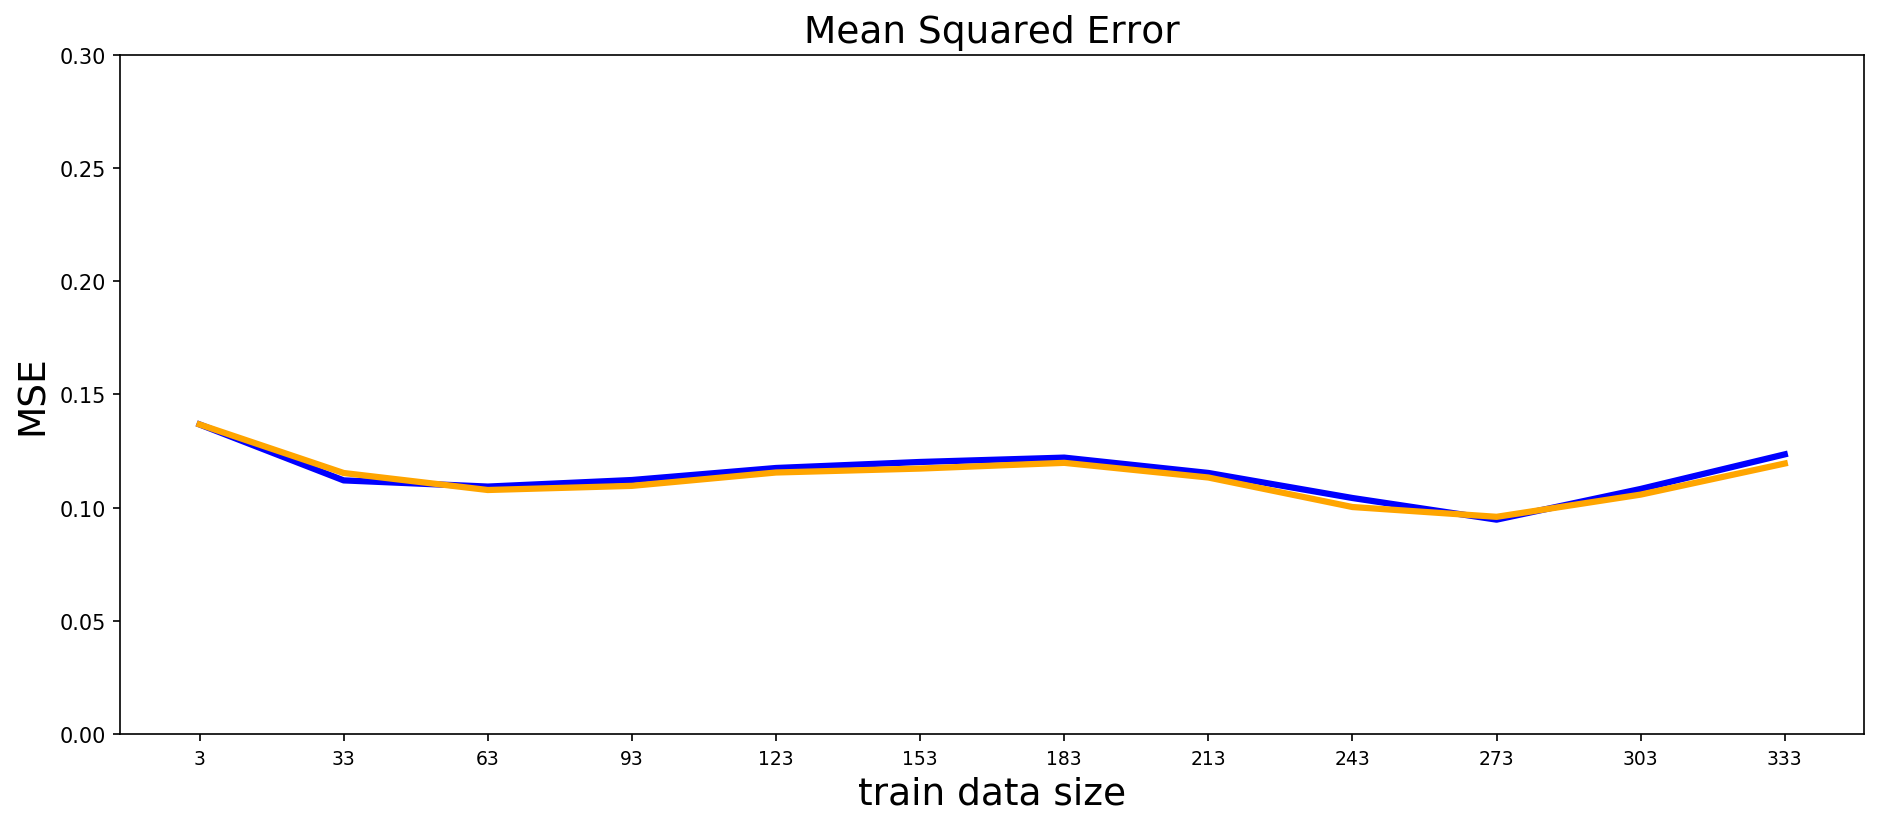

In [26]:
plt.figure(figsize=(15, 6), dpi=150)

xvalue = list(range(3, test.shape[0], ln))

plt.plot(xvalue, rsq_linear, color='blue', linewidth=3)
plt.plot(xvalue, rsq_nonlinear, color='orange', linewidth=3)

plt.ylim(0,0.3)
plt.xticks(xvalue, fontsize=9)

plt.title('Mean Squared Error', size=18)
plt.xlabel('train data size',size=18)
plt.ylabel('MSE',size=18)
#plt.legend()
plt.show()